In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# open file
data = pd.read_csv("wine.csv")
data = data.dropna()

X = data.drop("Class", axis=1)
y = data["Class"]


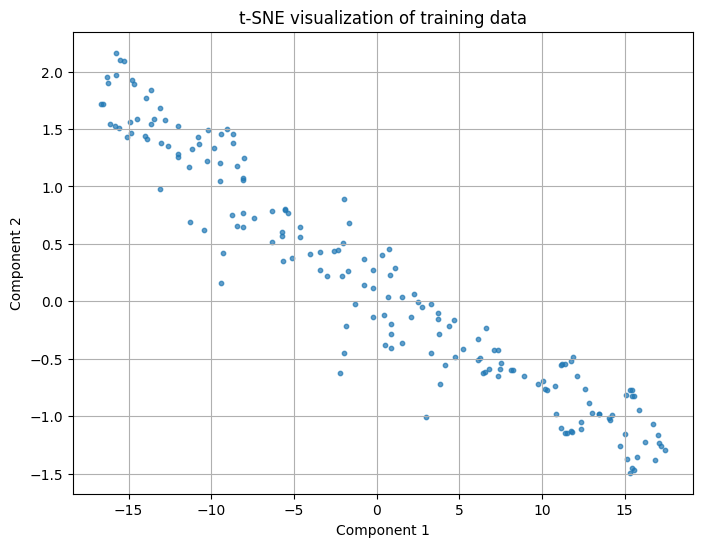

In [5]:
# use t-sne to visualize the data
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2,
            init='pca',
            random_state=123)
X_tsne = tsne.fit_transform(X)

# show a scatter plot of the two components of t-sne of all data points

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.7)
plt.title("t-SNE visualization of training data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create a logistic regression model
lrm = LogisticRegression(max_iter=1000, random_state=42)
lrm.fit(X_train_scaled, y_train)
y_pred_lrm = lrm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lrm)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


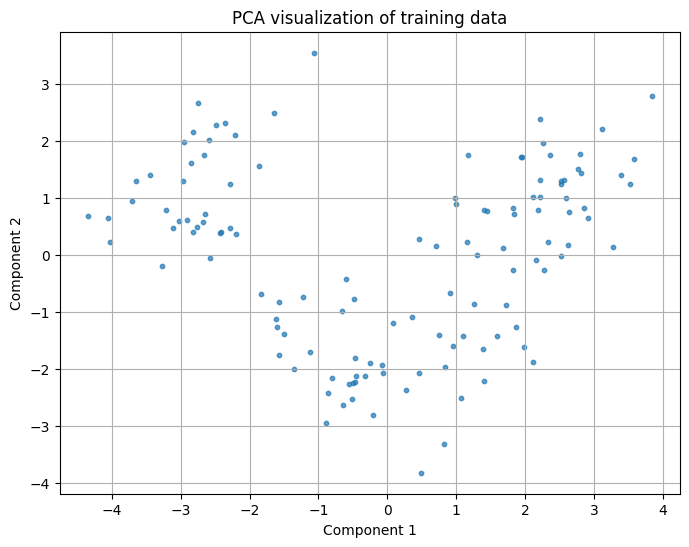

In [ ]:
# perform pca on the data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# earlier i split into test and train sets, so i will use the training set to fit the pca model
# no need to resplit the data

X_train_pca = pca.fit_transform(X_train_scaled)

# for use in testing - 
X_test_pca = pca.transform(X_test_scaled)

# show a scatter plot of the two components of pca of all data points
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], s=10, alpha=0.7)
plt.title("PCA visualization of training data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix

# train lrm using first two pca components
lrm2 = LogisticRegression(multi_class='ovr',
        random_state=1,
        solver='lbfgs')

lrm2.fit(X_train_pca, y_train)
y_pred_lrm2 = lrm2.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_lrm2)
print(confmat)
acc=accuracy_score(y_test, y_pred_lrm2)
print(f"acc={acc:.3f}")



[[16  2  0]
 [ 1 20  0]
 [ 0  0 15]]
acc=0.944


c:\Users\hanna\ECE_548\ece-548-ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
